In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
%matplotlib inline

### Ładowanie i przetworzenie danych

In [60]:
train = pd.read_csv('monthly_temperature.csv')

train.index = train.timestamp = pd.to_datetime(train.Month, format='%Y/%m')
train.drop('Month', axis=1, inplace=True)

train.head()

C:\Users\Arek\AppData\Local\Temp\ipykernel_9196\342602760.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train.index = train.timestamp = pd.to_datetime(train.Month, format='%Y/%m')


,Mean_Temperature
Month,
1850-01-01,-0.6746
1850-02-01,-0.3334
1850-03-01,-0.5913
1850-04-01,-0.5887
1850-05-01,-0.5088


### Metody sprawdzania stacjonarności

Badanie wizualne

<Axes: xlabel='Month'>

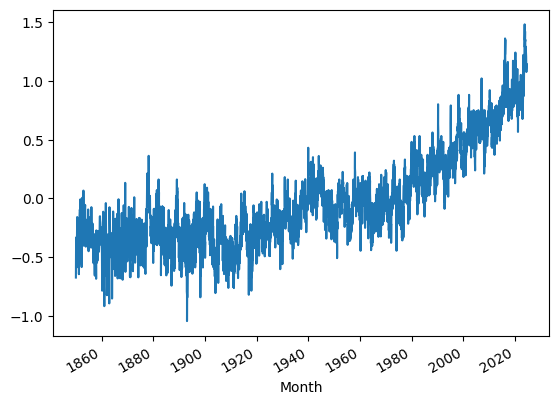

In [61]:
train['Mean_Temperature'].plot()

Test ADF (Rozszerzony Test Dickeya Fullera)

In [62]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    print(f'Results of Dickey-Fuller Test:\n{dfoutput}')

In [63]:
adf_test(train['Mean_Temperature'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.138103
p-value                           0.699640
#Lags Used                       30.000000
Number of Observations Used    3792.000000
Critical Value 1%                -3.432076
Critical Value 5%                -2.862303
Critical Value 10%               -2.567176
dtype: float64


Test KPSS (Kwiatkowskiego-Phillipsa-Schmidta-Shina)

In [64]:
def kpss_test(timeseries):
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output[f'Critical Value {key}'] = value
    print(f'Results of KPSS Test:\n{kpss_output}')

In [65]:
kpss_test(train['Mean_Temperature'])

Results of KPSS Test:
Test Statistic          7.870304
p-value                 0.010000
Lags Used              38.000000
Critical Value 10%      0.347000
Critical Value 5%       0.463000
Critical Value 2.5%     0.574000
Critical Value 1%       0.739000
dtype: float64


C:\Users\Arek\AppData\Local\Temp\ipykernel_9196\1309912325.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


### Tworzenie szeregu czasowego stacjonarnego

Różnicowanie

<Axes: xlabel='Month'>

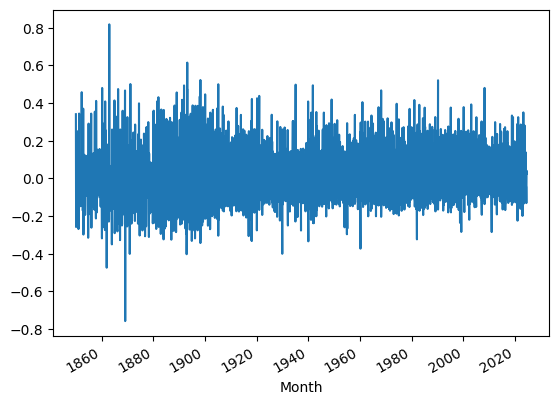

In [66]:
train['Mean_Temperature_diff'] = train['Mean_Temperature'] - train['Mean_Temperature'].shift(1)
train['Mean_Temperature_diff'].dropna().plot()

Różnicowanie sezonowe

<Axes: xlabel='Month'>

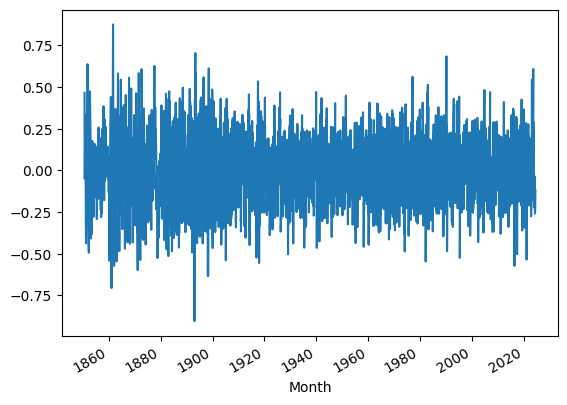

In [67]:
n = 7
train['Mean_Temperature_diff'] = train['Mean_Temperature'] - train['Mean_Temperature'].shift(n)
train['Mean_Temperature_diff'].dropna().plot()

Transformacja

C:\Users\Arek\PycharmProjects\Statistics-Algebra\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Arek\PycharmProjects\Statistics-Algebra\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Month'>

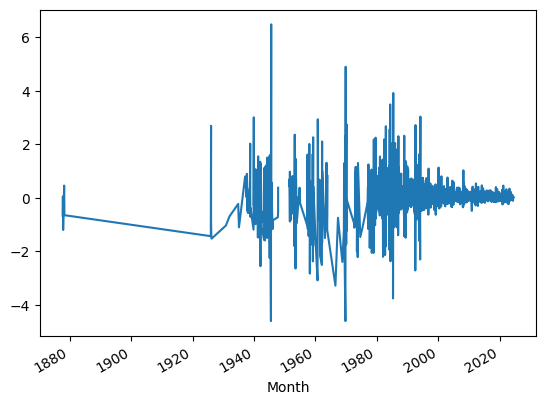

In [68]:
train['Mean_Temperature_log'] = np.log(train['Mean_Temperature'])
train['Mean_Temperature_log_diff'] = train['Mean_Temperature_log'] - train['Mean_Temperature_log'].shift(1)
train['Mean_Temperature_log_diff'].dropna().plot()